In [6]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy import linalg
EPSILON = 1.1920929e-07
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import Parallel, delayed
import scanpy as sc
import pandas as pd
import spatialdm as sdm
import squidpy as sq
import tqdm
import adjustText
from scipy.optimize import minimize, minimize_scalar
from sklearn.neighbors import NearestNeighbors
import importlib
import networkx as nx
#import gseapy_like_plot as pl
from adjustText import adjust_text

In [7]:
import itertools
score_pair = list(itertools.combinations(['rho_zero', 'scc','global_I'],2))

In [8]:
score_pair

[('rho_zero', 'scc'), ('rho_zero', 'global_I'), ('scc', 'global_I')]

In [9]:
sdm.__version__

'0.1.2'

In [10]:
# custom package import
import sys
sys.path.append("/Users/hs0424/Workspace/copulacci/src/copulacci/")
import cci
import spatial
import model
import simulation

/Users/hs0424/miniforge3/envs/py390/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Find list of ligand and receptors

In [94]:
adata = sc.read_h5ad('data/human_breast_visium/adata.h5ad')

,MIR1302-2HG,FAM138A,OR4F5,AL627309.1,AL627309.3,AL627309.2,AL627309.5,AL627309.4,AP006222.2,AL732372.1,...,AC133551.1,AC136612.1,AC136616.1,AC136616.3,AC136616.2,AC141272.1,AC023491.2,AC007325.1,AC007325.4,AC007325.2
AAACAAGTATCTCCCA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACACCAATAACTGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACAGAGCGACTCCT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACAGGGTCTATATT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACAGTGTTCCTGGG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTTGTGTGTCAAGA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
TTGTTTCACATCCAGG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTGTTTCATTAGTCTA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTGTTTCCATACAACT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Extract spatialsm LR

In [7]:
# Same parameters as given in SDM tutorial
sdm.extract_lr(adata, 'human', min_cell=20)
adata_sdm = adata.copy()
sdm.weight_matrix(adata_sdm, l=273, single_cell=False)

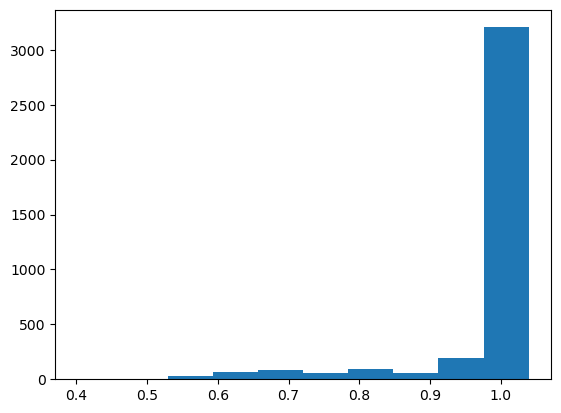

In [8]:
plt.hist(adata_sdm.obsp['weight'].toarray().sum(0));

## Construct the spatial graph and prepare to run copulacci

In [11]:
G = nx.from_scipy_sparse_array(adata_sdm.obsp['nearest_neighbors'])
adata.obs['celltype'] = adata.obs.annot_type
int_edges_new, int_edges_with_selfloop = spatial.construct_boundary(
    adata, 
    G = G,
    weight_mat=adata_sdm.obsp['weight']
)
df_lig_rec_linear = cci.extract_lig_rec_from_sdm(adata, allow_same_lr=True)
chosen_lr = list(set( df_lig_rec_linear.ligand.unique()).union(
    set( df_lig_rec_linear.receptor.unique() )
))
count_df = adata.raw.to_adata().to_df().loc[:,chosen_lr]
lig_list = adata.uns['ligand'].values
rec_list = adata.uns['receptor'].values

data_list_dict, umi_sums, dist_list_dict = spatial.prepare_data_list(
    count_df,
    int_edges_new,
    heteromeric=True,
    lig_list=lig_list,
    rec_list = rec_list,
    summarization='sum'
)

relabeling nodes


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:16<00:00,  1.02s/it]


## Run copula

In [12]:
df_lig_rec = pd.concat(
   [ adata.uns['ligand'], adata.uns['receptor']],
    axis = 1
)

cop_df_dict = model.run_copula(
    data_list_dict,
    umi_sums,
    dist_list_dict,
    DT=False,
    cutoff = 0.8,
    type_run='dense',
    num_restarts=1,
    df_lig_rec=df_lig_rec,
    heteronomic=True
)

Surrounding tumor=Surrounding tumor


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
/Users/hs0424/miniforge3/envs/py390/lib/python3.9/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    6.4s
/Users/hs0424/miniforge3/envs/py390/lib/python3.9/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/Users/hs0424/miniforge3/envs/py390/lib/python3.9/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/Users/hs0424/miniforge3/envs/py390/lib/python3.9/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array 

Invasive=Invasive


[Parallel(n_jobs=20)]: Done 362 tasks      | elapsed:   20.7s
[Parallel(n_jobs=20)]: Done 630 tasks      | elapsed:   39.2s
[Parallel(n_jobs=20)]: Done 1040 tasks      | elapsed:   49.8s
[Parallel(n_jobs=20)]: Done 1276 out of 1315 | elapsed:   54.7s remaining:    1.7s
[Parallel(n_jobs=20)]: Done 1315 out of 1315 | elapsed:  1.0min finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
/Users/hs0424/miniforge3/envs/py390/lib/python3.9/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/Users/hs0424/miniforge3/envs/py390/lib/python3.9/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/Users/hs0424/miniforge3/envs/py390/lib/python3.9/site-packages/scipy/stats/_stats_py.py:5445:

Healthy=Healthy


/Users/hs0424/miniforge3/envs/py390/lib/python3.9/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/Users/hs0424/miniforge3/envs/py390/lib/python3.9/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
[Parallel(n_jobs=20)]: Done 600 tasks      | elapsed:    4.7s
[Parallel(n_jobs=20)]: Done 1315 out of 1315 | elapsed:    7.9s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s


Tumor=Tumor


/Users/hs0424/miniforge3/envs/py390/lib/python3.9/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
[Parallel(n_jobs=20)]: Done 440 tasks      | elapsed:    5.8s
[Parallel(n_jobs=20)]: Done 848 tasks      | elapsed:    9.1s
[Parallel(n_jobs=20)]: Done 1315 out of 1315 | elapsed:   12.4s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s


Invasive=Surrounding tumor


/Users/hs0424/miniforge3/envs/py390/lib/python3.9/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
[Parallel(n_jobs=20)]: Done 600 tasks      | elapsed:    4.4s
[Parallel(n_jobs=20)]: Done 1219 tasks      | elapsed:    6.0s
[Parallel(n_jobs=20)]: Done 1276 out of 1315 | elapsed:    6.2s remaining:    0.2s
[Parallel(n_jobs=20)]: Done 1315 out of 1315 | elapsed:    6.4s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s


Surrounding tumor=Invasive


[Parallel(n_jobs=20)]: Done 440 tasks      | elapsed:    3.1s
[Parallel(n_jobs=20)]: Done 1315 out of 1315 | elapsed:    6.9s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s


Tumor=Invasive


[Parallel(n_jobs=20)]: Done 600 tasks      | elapsed:    2.7s
[Parallel(n_jobs=20)]: Done 1315 out of 1315 | elapsed:    4.5s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s


Invasive=Tumor


[Parallel(n_jobs=20)]: Done 600 tasks      | elapsed:    2.4s
[Parallel(n_jobs=20)]: Done 1315 out of 1315 | elapsed:    4.0s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s


Tumor=Surrounding tumor


[Parallel(n_jobs=20)]: Done 600 tasks      | elapsed:    3.8s
[Parallel(n_jobs=20)]: Done 1215 tasks      | elapsed:    5.2s
[Parallel(n_jobs=20)]: Done 1276 out of 1315 | elapsed:    5.3s remaining:    0.2s
[Parallel(n_jobs=20)]: Done 1315 out of 1315 | elapsed:    5.7s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s


Surrounding tumor=Tumor


[Parallel(n_jobs=20)]: Done 600 tasks      | elapsed:    3.8s
[Parallel(n_jobs=20)]: Done 1221 tasks      | elapsed:    4.8s
[Parallel(n_jobs=20)]: Done 1276 out of 1315 | elapsed:    4.9s remaining:    0.1s
[Parallel(n_jobs=20)]: Done 1315 out of 1315 | elapsed:    5.1s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s


Healthy=Tumor


[Parallel(n_jobs=20)]: Done 600 tasks      | elapsed:    2.6s
[Parallel(n_jobs=20)]: Done 1276 out of 1315 | elapsed:    3.8s remaining:    0.1s
[Parallel(n_jobs=20)]: Done 1315 out of 1315 | elapsed:    4.1s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s


Tumor=Healthy


[Parallel(n_jobs=20)]: Done 600 tasks      | elapsed:    2.8s
[Parallel(n_jobs=20)]: Done 1235 tasks      | elapsed:    3.8s
[Parallel(n_jobs=20)]: Done 1276 out of 1315 | elapsed:    3.8s remaining:    0.1s
[Parallel(n_jobs=20)]: Done 1315 out of 1315 | elapsed:    4.2s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s


Healthy=Surrounding tumor


[Parallel(n_jobs=20)]: Done 600 tasks      | elapsed:    1.9s
[Parallel(n_jobs=20)]: Done 1249 tasks      | elapsed:    2.4s
[Parallel(n_jobs=20)]: Done 1276 out of 1315 | elapsed:    2.4s remaining:    0.1s
[Parallel(n_jobs=20)]: Done 1315 out of 1315 | elapsed:    3.0s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s


Surrounding tumor=Healthy


[Parallel(n_jobs=20)]: Done 600 tasks      | elapsed:    2.4s
[Parallel(n_jobs=20)]: Done 1315 out of 1315 | elapsed:    3.5s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s


Healthy=Invasive


[Parallel(n_jobs=20)]: Done 600 tasks      | elapsed:    2.3s
[Parallel(n_jobs=20)]: Done 1315 out of 1315 | elapsed:    3.5s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s


Invasive=Healthy


[Parallel(n_jobs=20)]: Done 600 tasks      | elapsed:    2.3s
[Parallel(n_jobs=20)]: Done 1242 tasks      | elapsed:    2.9s
[Parallel(n_jobs=20)]: Done 1276 out of 1315 | elapsed:    3.0s remaining:    0.1s
[Parallel(n_jobs=20)]: Done 1315 out of 1315 | elapsed:    3.5s finished


## Run SCC

In [13]:
cop_df_dict = model.run_scc(
    count_df,
    None,
    cop_df_dict,
    int_edges_new,
    groups = list(data_list_dict.keys()),
    heteronomic=True,
    lig_list=lig_list,
    rec_list = rec_list,
    summarization = "sum"
)

Surrounding tumor=Surrounding tumor
Graph with 421 nodes and 1330 edges


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
/Users/hs0424/Workspace/copulacci/src/copulacci/model.py:1397: RuntimeWarning: invalid value encountered in scalar divide
  SCC = (N/W) * (cv/v) / 2.0
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.1s
/Users/hs0424/Workspace/copulacci/src/copulacci/model.py:1397: RuntimeWarning: invalid value encountered in scalar divide
  SCC = (N/W) * (cv/v) / 2.0
/Users/hs0424/Workspace/copulacci/src/copulacci/model.py:1397: RuntimeWarning: invalid value encountered in scalar divide
  SCC = (N/W) * (cv/v) / 2.0
/Users/hs0424/Workspace/copulacci/src/copulacci/model.py:1397: RuntimeWarning: invalid value encountered in scalar divide
  SCC = (N/W) * (cv/v) / 2.0
/Users/hs0424/Workspace/copulacci/src/copulacci/model.py:1397: RuntimeWarning: invalid value encountered in scalar divide
  SCC = (N/W) * (cv/v) / 2.0
/Users/hs0424/Workspace/copulacci/src/copulacci/model.py:1397: RuntimeWarning: invalid value encountered i

Invasive=Invasive
Graph with 1634 nodes and 5651 edges


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.2s
[Parallel(n_jobs=20)]: Done 280 tasks      | elapsed:    4.2s
[Parallel(n_jobs=20)]: Done 780 tasks      | elapsed:   11.2s
[Parallel(n_jobs=20)]: Done 1276 out of 1315 | elapsed:   17.8s remaining:    0.5s
[Parallel(n_jobs=20)]: Done 1315 out of 1315 | elapsed:   18.3s finished


Healthy=Healthy
Graph with 355 nodes and 1219 edges


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
/Users/hs0424/Workspace/copulacci/src/copulacci/model.py:1397: RuntimeWarning: invalid value encountered in scalar divide
  SCC = (N/W) * (cv/v) / 2.0
/Users/hs0424/Workspace/copulacci/src/copulacci/model.py:1397: RuntimeWarning: invalid value encountered in scalar divide
  SCC = (N/W) * (cv/v) / 2.0
[Parallel(n_jobs=20)]: Done 600 tasks      | elapsed:    0.8s
[Parallel(n_jobs=20)]: Done 1315 out of 1315 | elapsed:    1.6s finished


Tumor=Tumor
Graph with 331 nodes and 1106 edges


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 600 tasks      | elapsed:    0.8s
/Users/hs0424/Workspace/copulacci/src/copulacci/model.py:1397: RuntimeWarning: invalid value encountered in scalar divide
  SCC = (N/W) * (cv/v) / 2.0
[Parallel(n_jobs=20)]: Done 1315 out of 1315 | elapsed:    1.8s finished


Invasive=Surrounding tumor
DiGraph with 603 nodes and 580 edges


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done 280 tasks      | elapsed:    1.5s
[Parallel(n_jobs=20)]: Done 780 tasks      | elapsed:    4.0s
[Parallel(n_jobs=20)]: Done 1276 out of 1315 | elapsed:    6.6s remaining:    0.2s
[Parallel(n_jobs=20)]: Done 1315 out of 1315 | elapsed:    6.8s finished


Surrounding tumor=Invasive
DiGraph with 603 nodes and 580 edges


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done 280 tasks      | elapsed:    1.4s
[Parallel(n_jobs=20)]: Done 780 tasks      | elapsed:    4.0s
[Parallel(n_jobs=20)]: Done 1276 out of 1315 | elapsed:    6.6s remaining:    0.2s
[Parallel(n_jobs=20)]: Done 1315 out of 1315 | elapsed:    6.8s finished


Tumor=Invasive
DiGraph with 32 nodes and 23 edges


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 600 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done 1315 out of 1315 | elapsed:    0.1s finished


Invasive=Tumor
DiGraph with 32 nodes and 23 edges


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 600 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done 1315 out of 1315 | elapsed:    0.1s finished


Tumor=Surrounding tumor
DiGraph with 239 nodes and 222 edges


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 600 tasks      | elapsed:    0.4s
[Parallel(n_jobs=20)]: Done 1315 out of 1315 | elapsed:    0.9s finished


Surrounding tumor=Tumor
DiGraph with 239 nodes and 222 edges


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
/Users/hs0424/Workspace/copulacci/src/copulacci/model.py:1397: RuntimeWarning: invalid value encountered in scalar divide
  SCC = (N/W) * (cv/v) / 2.0
[Parallel(n_jobs=20)]: Done 600 tasks      | elapsed:    0.4s
[Parallel(n_jobs=20)]: Done 1315 out of 1315 | elapsed:    1.0s finished


Healthy=Tumor
DiGraph with 30 nodes and 26 edges


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 600 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done 1315 out of 1315 | elapsed:    0.1s finished


Tumor=Healthy
DiGraph with 30 nodes and 26 edges


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 600 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done 1315 out of 1315 | elapsed:    0.1s finished


Healthy=Surrounding tumor
DiGraph with 179 nodes and 158 edges


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 600 tasks      | elapsed:    0.3s
[Parallel(n_jobs=20)]: Done 1315 out of 1315 | elapsed:    0.6s finished


Surrounding tumor=Healthy
DiGraph with 179 nodes and 158 edges


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 600 tasks      | elapsed:    0.3s
[Parallel(n_jobs=20)]: Done 1315 out of 1315 | elapsed:    0.6s finished


Healthy=Invasive
DiGraph with 61 nodes and 51 edges


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 600 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done 1315 out of 1315 | elapsed:    0.2s finished


Invasive=Healthy
DiGraph with 61 nodes and 51 edges


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 600 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done 1315 out of 1315 | elapsed:    0.2s finished


# Run SpatialDM

In [14]:
sdm_df_dict = model.run_sdm(
    adata,
    int_edges_new,
    groups = list(cop_df_dict.keys()),
    nproc = 20,
    heteronomic=True
)

Surrounding tumor=Surrounding tumor
Graph with 421 nodes and 1330 edges
(421, 36601)


/Users/hs0424/miniforge3/envs/py390/lib/python3.9/site-packages/spatialdm/utils.py:235: RuntimeWarning: invalid value encountered in divide
  X = X/X.max()


time taken for  Surrounding tumor=Surrounding tumor  is  46.749013900756836  seconds
Invasive=Invasive
Graph with 1634 nodes and 5651 edges
(1634, 36601)


/Users/hs0424/miniforge3/envs/py390/lib/python3.9/site-packages/spatialdm/utils.py:235: RuntimeWarning: invalid value encountered in divide
  X = X/X.max()


time taken for  Invasive=Invasive  is  163.31918382644653  seconds
Healthy=Healthy
Graph with 355 nodes and 1219 edges
(355, 36601)


/Users/hs0424/miniforge3/envs/py390/lib/python3.9/site-packages/spatialdm/utils.py:235: RuntimeWarning: invalid value encountered in divide
  X = X/X.max()


time taken for  Healthy=Healthy  is  34.55496597290039  seconds
Tumor=Tumor
Graph with 331 nodes and 1106 edges
(331, 36601)


/Users/hs0424/miniforge3/envs/py390/lib/python3.9/site-packages/spatialdm/utils.py:235: RuntimeWarning: invalid value encountered in divide
  X = X/X.max()


time taken for  Tumor=Tumor  is  50.827584743499756  seconds
Invasive=Surrounding tumor
DiGraph with 603 nodes and 580 edges
(603, 36601)


/Users/hs0424/miniforge3/envs/py390/lib/python3.9/site-packages/spatialdm/utils.py:235: RuntimeWarning: invalid value encountered in divide
  X = X/X.max()


time taken for  Invasive=Surrounding tumor  is  64.43641591072083  seconds
Surrounding tumor=Invasive
DiGraph with 603 nodes and 580 edges
(603, 36601)


/Users/hs0424/miniforge3/envs/py390/lib/python3.9/site-packages/spatialdm/utils.py:235: RuntimeWarning: invalid value encountered in divide
  X = X/X.max()


time taken for  Surrounding tumor=Invasive  is  76.19788789749146  seconds
Tumor=Invasive
DiGraph with 32 nodes and 23 edges
(32, 36601)


/Users/hs0424/miniforge3/envs/py390/lib/python3.9/site-packages/spatialdm/utils.py:235: RuntimeWarning: invalid value encountered in divide
  X = X/X.max()


time taken for  Tumor=Invasive  is  29.9790620803833  seconds
Invasive=Tumor
DiGraph with 32 nodes and 23 edges
(32, 36601)


/Users/hs0424/miniforge3/envs/py390/lib/python3.9/site-packages/spatialdm/utils.py:235: RuntimeWarning: invalid value encountered in divide
  X = X/X.max()


time taken for  Invasive=Tumor  is  28.096138954162598  seconds
Tumor=Surrounding tumor
DiGraph with 239 nodes and 222 edges
(239, 36601)


/Users/hs0424/miniforge3/envs/py390/lib/python3.9/site-packages/spatialdm/utils.py:235: RuntimeWarning: invalid value encountered in divide
  X = X/X.max()


time taken for  Tumor=Surrounding tumor  is  42.46972107887268  seconds
Surrounding tumor=Tumor
DiGraph with 239 nodes and 222 edges
(239, 36601)


/Users/hs0424/miniforge3/envs/py390/lib/python3.9/site-packages/spatialdm/utils.py:235: RuntimeWarning: invalid value encountered in divide
  X = X/X.max()


time taken for  Surrounding tumor=Tumor  is  39.824333906173706  seconds
Healthy=Tumor
DiGraph with 30 nodes and 26 edges
(30, 36601)


/Users/hs0424/miniforge3/envs/py390/lib/python3.9/site-packages/spatialdm/utils.py:235: RuntimeWarning: invalid value encountered in divide
  X = X/X.max()


time taken for  Healthy=Tumor  is  27.30438494682312  seconds
Tumor=Healthy
DiGraph with 30 nodes and 26 edges
(30, 36601)


/Users/hs0424/miniforge3/envs/py390/lib/python3.9/site-packages/spatialdm/utils.py:235: RuntimeWarning: invalid value encountered in divide
  X = X/X.max()


time taken for  Tumor=Healthy  is  23.95939874649048  seconds
Healthy=Surrounding tumor
DiGraph with 179 nodes and 158 edges
(179, 36601)


/Users/hs0424/miniforge3/envs/py390/lib/python3.9/site-packages/spatialdm/utils.py:235: RuntimeWarning: invalid value encountered in divide
  X = X/X.max()


time taken for  Healthy=Surrounding tumor  is  31.74776291847229  seconds
Surrounding tumor=Healthy
DiGraph with 179 nodes and 158 edges
(179, 36601)


/Users/hs0424/miniforge3/envs/py390/lib/python3.9/site-packages/spatialdm/utils.py:235: RuntimeWarning: invalid value encountered in divide
  X = X/X.max()


time taken for  Surrounding tumor=Healthy  is  31.52197289466858  seconds
Healthy=Invasive
DiGraph with 61 nodes and 51 edges
(61, 36601)


/Users/hs0424/miniforge3/envs/py390/lib/python3.9/site-packages/spatialdm/utils.py:235: RuntimeWarning: invalid value encountered in divide
  X = X/X.max()


time taken for  Healthy=Invasive  is  27.28243112564087  seconds
Invasive=Healthy
DiGraph with 61 nodes and 51 edges
(61, 36601)


/Users/hs0424/miniforge3/envs/py390/lib/python3.9/site-packages/spatialdm/utils.py:235: RuntimeWarning: invalid value encountered in divide
  X = X/X.max()


time taken for  Invasive=Healthy  is  28.537650108337402  seconds


## Merged results

In [16]:
merged_res = {}
for gpair in cop_df_dict.keys():
    tmp1 = sdm_df_dict[gpair].copy()
    tmp2 = cop_df_dict[gpair]
    merged_res[gpair] = tmp1.join(tmp2, how = 'inner').copy()

In [28]:
merged_res.keys()

dict_keys(['Surrounding tumor=Surrounding tumor', 'Invasive=Invasive', 'Healthy=Healthy', 'Tumor=Tumor', 'Invasive=Surrounding tumor', 'Surrounding tumor=Invasive', 'Tumor=Invasive', 'Invasive=Tumor', 'Tumor=Surrounding tumor', 'Surrounding tumor=Tumor', 'Healthy=Tumor', 'Tumor=Healthy', 'Healthy=Surrounding tumor', 'Surrounding tumor=Healthy', 'Healthy=Invasive', 'Invasive=Healthy'])

In [676]:
merged_res_bk = merged_res.copy()

In [677]:
for gpair in cop_df_dict.keys():
    merged_res_bk[gpair]['celltype_direction'] = gpair

In [678]:
merged_df = pd.concat(merged_res_bk.values(), axis = 0)

In [680]:
merged_df.head()

,interaction_name,pathway_name,agonist,antagonist,co_A_receptor,co_I_receptor,evidence,annotation,interaction_name_2,global_I,global_pval,rho_zero,rho_one,mu_x,mu_y,copula_method,scc,celltype_direction
EFNA5_EPHB2,EFNA5_EPHB2,EPHA,NaN,NaN,NaN,NaN,PMID:15107857; PMID: 15114347,Cell-Cell Contact,EFNA5 - EPHB2,-0.021375,0.741615,0.0,0.0,0.0,0.0,skip,-0.051060,Surrounding tumor=Surrounding tumor
EFNB1_EPHB2,EFNB1_EPHB2,EPHB,NaN,NaN,NaN,NaN,PMID: 15114347,Cell-Cell Contact,EFNB1 - EPHB2,0.041875,0.156344,0.0,0.0,0.0,0.0,skip,0.021454,Surrounding tumor=Surrounding tumor
EFNB1_EPHB3,EFNB1_EPHB3,EPHB,NaN,NaN,NaN,NaN,PMID: 15114347,Cell-Cell Contact,EFNB1 - EPHB3,0.029437,0.246130,0.0,0.0,0.0,0.0,skip,-0.001314,Surrounding tumor=Surrounding tumor
EFNB1_EPHB4,EFNB1_EPHB4,EPHB,NaN,NaN,NaN,NaN,PMID: 15114347,Cell-Cell Contact,EFNB1 - EPHB4,0.054084,0.091015,0.0,0.0,0.0,0.0,skip,-0.014581,Surrounding tumor=Surrounding tumor
EFNB2_EPHB2,EFNB2_EPHB2,EPHB,NaN,NaN,NaN,NaN,PMID: 15114347,Cell-Cell Contact,EFNB2 - EPHB2,0.050019,0.109951,0.0,0.0,0.0,0.0,skip,0.000776,Surrounding tumor=Surrounding tumor


In [29]:
score_pair

[('rho_zero', 'scc'), ('rho_zero', 'global_I'), ('scc', 'global_I')]

In [48]:
res.annotation.value_counts()

annotation
ECM-Receptor          194
Secreted Signaling    107
Cell-Cell Contact      82
Name: count, dtype: int64

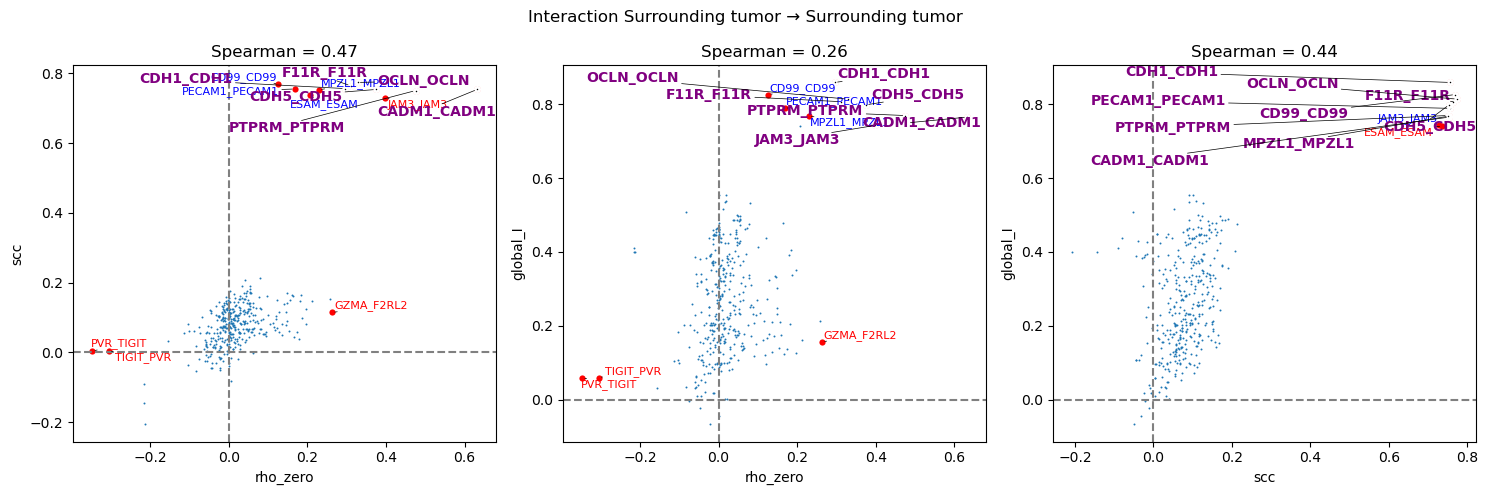

In [49]:
for gpair in merged_res:
    res = merged_res[gpair].copy()
    #res = res.drop_duplicates(['ligand', 'receptor'])
    # only take non sparse entries
    res = res.loc[res.copula_method == 'copula'].fillna(0)
    ncol = len(score_pair)
    _, ax = plt.subplots(1,ncol, figsize=(5*ncol,5))
    for i,(x_col, y_col) in enumerate(score_pair):
        sig1 = res.sort_values(by=x_col, key=lambda x: abs(x), ascending=False)[:10]
        sig2 = res.sort_values(by=y_col, key=lambda x: abs(x), ascending=False)[:10]

        sig12 = sig1.join(sig2, rsuffix='_2',how='inner')
        
        sns.scatterplot(data = res, 
                        x = x_col, 
                        y = y_col, s = 2, linewidth = 0,ax = ax[i])
        sns.scatterplot(
                data = sig1, 
                x = x_col, 
                y = y_col, 
                s = 20, c='r', linewidth = 0,ax = ax[i])
        sns.scatterplot(
                data = sig2, 
                x = x_col,
                y = y_col, 
                s = 20, c='r', linewidth = 0,ax = ax[i])

        text_sig = []
        for j,r in sig1.drop(sig12.index).iterrows():
            text_sig.append(ax[i].text(x=r[x_col], y = r[y_col], 
                                        s = j,
                                        color=(1, 0, 0),
                                        fontsize = 8
                                    ))
        
        for j,r in sig2.drop(sig12.index).iterrows():
            text_sig.append(ax[i].text(x=r[x_col], y = r[y_col], 
                                        s = j,
                                        color=(0, 0, 1),
                                        fontsize = 8
                                    ))
        
        if(len(text_sig) > 0):
            adjust_text(text_sig,arrowprops=dict(arrowstyle="-", color='black', lw=0.5),ax=ax[i])
        
        if (len(sig12) > 0):
            sns.scatterplot(data = sig12, 
                                x = x_col, y = y_col, s = 10, c='black', linewidth = 2,
                                ax = ax[i])
            text_sig12 = []
            for j,r in sig12.iterrows():
                text_sig12.append(ax[i].text(x=r[x_col], y = r[y_col], 
                                            s = j,
                                            color = (0.5, 0, 0.5),
                                            fontsize = 10,
                                            weight='bold'
                                        ))
            adjust_text(text_sig12,arrowprops=dict(arrowstyle="-", color='black', lw=0.5),ax=ax[i])
        ax[i].set_title(f'Spearman = { stats.spearmanr(res[x_col].values, res[y_col].values)[0] :.2f}')
        ax[i].axhline(0, color='grey', linestyle='--')
        ax[i].axvline(0, color='grey', linestyle='--')
        
    
    plt.suptitle('Interaction '+gpair.replace('=',' → '))
    plt.tight_layout()
    plt.show()
    break

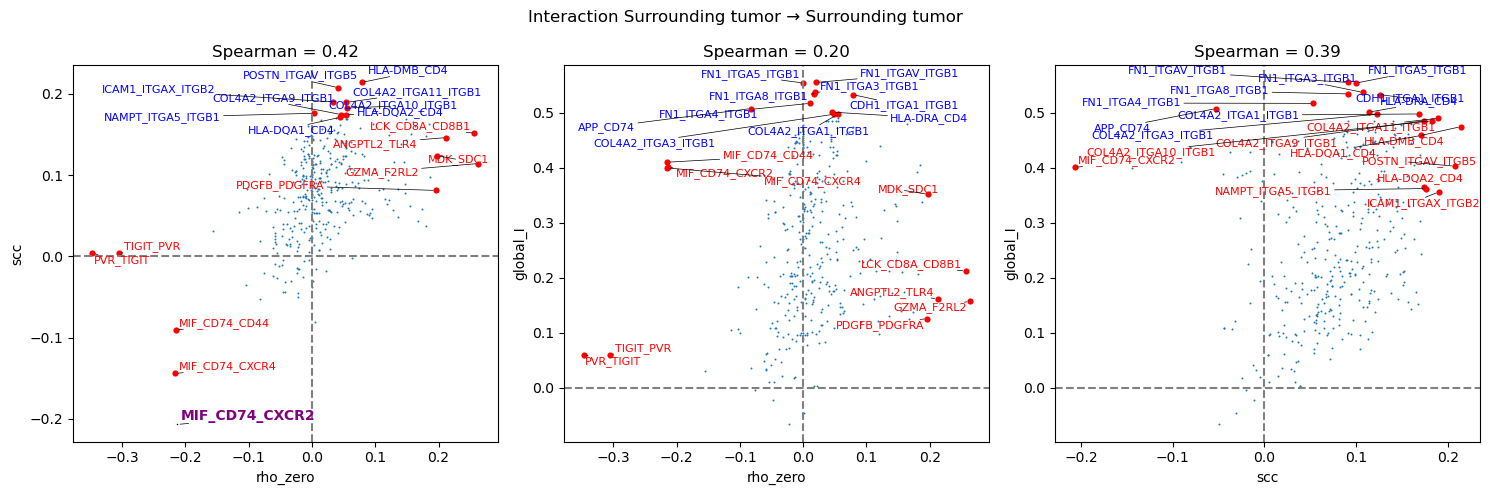

In [55]:
for gpair in merged_res:
    res = merged_res[gpair].copy()
    #res = res.drop_duplicates(['ligand', 'receptor'])
    # only take non sparse entries
    res = res.loc[res.copula_method == 'copula'].fillna(0)
    res = res.loc[
        res.interaction_name.str.split('_').str[0] != res.interaction_name.str.split('_').str[1]
    ].copy()
    ncol = len(score_pair)
    _, ax = plt.subplots(1,ncol, figsize=(5*ncol,5))
    for i,(x_col, y_col) in enumerate(score_pair):
        sig1 = res.sort_values(by=x_col, key=lambda x: abs(x), ascending=False)[:10]
        sig2 = res.sort_values(by=y_col, key=lambda x: abs(x), ascending=False)[:10]

        sig12 = sig1.join(sig2, rsuffix='_2',how='inner')
        
        sns.scatterplot(data = res, 
                        x = x_col, 
                        y = y_col, s = 2, linewidth = 0,ax = ax[i])
        sns.scatterplot(
                data = sig1, 
                x = x_col, 
                y = y_col, 
                s = 20, c='r', linewidth = 0,ax = ax[i])
        sns.scatterplot(
                data = sig2, 
                x = x_col,
                y = y_col, 
                s = 20, c='r', linewidth = 0,ax = ax[i])

        text_sig = []
        for j,r in sig1.drop(sig12.index).iterrows():
            text_sig.append(ax[i].text(x=r[x_col], y = r[y_col], 
                                        s = j,
                                        color=(1, 0, 0),
                                        fontsize = 8
                                    ))
        
        for j,r in sig2.drop(sig12.index).iterrows():
            text_sig.append(ax[i].text(x=r[x_col], y = r[y_col], 
                                        s = j,
                                        color=(0, 0, 1),
                                        fontsize = 8
                                    ))
        
        if(len(text_sig) > 0):
            adjust_text(text_sig,arrowprops=dict(arrowstyle="-", color='black', lw=0.5),ax=ax[i])
        
        if (len(sig12) > 0):
            sns.scatterplot(data = sig12, 
                                x = x_col, y = y_col, s = 10, c='black', linewidth = 2,
                                ax = ax[i])
            text_sig12 = []
            for j,r in sig12.iterrows():
                text_sig12.append(ax[i].text(x=r[x_col], y = r[y_col], 
                                            s = j,
                                            color = (0.5, 0, 0.5),
                                            fontsize = 10,
                                            weight='bold'
                                        ))
            adjust_text(text_sig12,arrowprops=dict(arrowstyle="-", color='black', lw=0.5),ax=ax[i])
        ax[i].set_title(f'Spearman = { stats.spearmanr(res[x_col].values, res[y_col].values)[0] :.2f}')
        ax[i].axhline(0, color='grey', linestyle='--')
        ax[i].axvline(0, color='grey', linestyle='--')
        
    
    plt.suptitle('Interaction '+gpair.replace('=',' → '))
    plt.tight_layout()
    plt.show()
    break

## Derive cell-type specific examples

For a cell-type the ligan-receptor pair correlation is scored as all the pairs 
where receiver end is of a particular cell-type. 

In [57]:
int_edges_new.loc[int_edges_new.celltype2]

,cell1,cell2,celltype1,celltype2,distance,boundary_type,interaction
0,AAACAAGTATCTCCCA-1,AAACAAGTATCTCCCA-1,Surrounding tumor,Surrounding tumor,0.143924,Internal,Surrounding tumor=Surrounding tumor
1,AAACAAGTATCTCCCA-1,ACTAGTTGCGATCGTC-1,Surrounding tumor,Surrounding tumor,0.087294,Internal,Surrounding tumor=Surrounding tumor
2,ACTAGTTGCGATCGTC-1,AAACAAGTATCTCCCA-1,Surrounding tumor,Surrounding tumor,0.087294,Internal,Surrounding tumor=Surrounding tumor
3,AAACAAGTATCTCCCA-1,CAGCAGTCCAGACTAT-1,Surrounding tumor,Surrounding tumor,0.087294,Internal,Surrounding tumor=Surrounding tumor
4,CAGCAGTCCAGACTAT-1,AAACAAGTATCTCCCA-1,Surrounding tumor,Surrounding tumor,0.087294,Internal,Surrounding tumor=Surrounding tumor
...,...,...,...,...,...,...,...
17986,TTCCGGTTACCCACTT-1,TTAGAGTTTAGAAGGA-1,Invasive,Surrounding tumor,0.086778,External,Invasive=Surrounding tumor
17987,TTATCCGGGATCTATA-1,TTCCTCGGACTAACCA-1,Invasive,Surrounding tumor,0.086937,External,Invasive=Surrounding tumor
17988,TTCCTCGGACTAACCA-1,TTATCCGGGATCTATA-1,Surrounding tumor,Invasive,0.086937,External,Surrounding tumor=Invasive
17989,TTCCGGTATCTGTGTC-1,TTCGCTAGGAAGTTGT-1,Tumor,Surrounding tumor,0.087294,External,Tumor=Surrounding tumor


In [59]:
importlib.reload(spatial)

<module 'spatial' from '/Users/hs0424/Workspace/copulacci/src/copulacci/spatial.py'>

In [113]:
cop_df_ct_dict = {}
data_list_ct_dict = {}
umi_sums_ct_dict = {}
dist_list_ct_dict = {}
for ct in adata.obs.old_annot_type.unique():
    data_list_ct, umi_sums_ct, dist_list_ct = spatial.prepare_data_list_cellype(
        count_df,
        int_edges_new,
        ct,
        heteromeric=True,
        lig_list=lig_list,
        rec_list = rec_list,
        summarization='sum'
    )
    cop_df_ct = Parallel(n_jobs=20, verbose=1)(
    delayed(model.call_optimizer_dense_dist)(
        x,
        y,
        umi_sums_ct['source'],
        umi_sums_ct['target'],
        dist_list_ct,
        method= 'Nelder-Mead',
        perm=20,
        DT=False,
        cutoff=0.8,
        length_cutoff=20,
        model='copula',
        num_restarts = 2) for (x,y) in data_list_ct)

    cop_df_ct = pd.DataFrame(cop_df_ct,columns=[
                    'rho_zero',
                    'rho_one',
                    'mu_x',
                    'mu_y',
                    'copula_method'
                ])

    cop_df_ct.index = df_lig_rec.index

    cop_df_ct_dict[ct] = cop_df_ct.copy()
    data_list_ct_dict[ct] = data_list_ct
    umi_sums_ct_dict[ct] = umi_sums_ct
    dist_list_ct_dict[ct] = dist_list_ct

[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
/Users/hs0424/miniforge3/envs/py390/lib/python3.9/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    6.3s
/Users/hs0424/miniforge3/envs/py390/lib/python3.9/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/Users/hs0424/miniforge3/envs/py390/lib/python3.9/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
[Parallel(n_jobs=20)]: Done 166 tasks      | elapsed:   10.3s
[Parallel(n_jobs=20)]: Done 494 tasks      | elapsed:   25.2s
[Paralle

In [114]:
ct =  'Surrounding tumor'

In [98]:
res = cop_df_ct_dict['Surrounding tumor'].sort_values(
    ['rho_zero'], ascending=False)
res = res.loc[res.copula_method == 'copula'].fillna(0)
res = res.loc[
        res.index.str.split('_').str[0] != res.index.str.split('_').str[1]
    ].copy()
res = res.join(df_lig_rec[['idx']])

In [102]:
res

,rho_zero,rho_one,mu_x,mu_y,copula_method
ANGPTL2_TLR4,0.331372,0.000000,-7.628969,-7.774855,copula
LCK_CD8A_CD8B1,0.307300,0.000000,-7.400446,-7.560395,copula
PDGFB_PDGFRA,0.261243,0.000000,-7.733124,-7.653528,copula
IL16_CD4,0.225444,0.000000,-7.308995,-6.747454,copula
HLA-DOA_CD4,0.223855,0.000000,-7.626348,-6.747271,copula
...,...,...,...,...,...
MIF_CD74_CXCR2,-0.278135,0.100000,-2.863562,-2.557865,copula
MIF_CD74_CD44,-0.278387,0.091054,-2.863213,-2.521552,copula
MIF_CD74_CXCR4,-0.279252,0.039798,-2.866068,-2.536639,copula
TIGIT_PVR,-0.326126,0.100000,-7.701370,-7.664599,copula


In [104]:
df_lig_rec.loc[:, 'idx'] = range(df_lig_rec.shape[0])

In [111]:
res = res.join(df_lig_rec[['idx']])

In [117]:
res.head()

,rho_zero,rho_one,mu_x,mu_y,copula_method,idx
ANGPTL2_TLR4,0.331372,0.0,-7.628969,-7.774855,copula,1145
LCK_CD8A_CD8B1,0.307300,0.0,-7.400446,-7.560395,copula,44
PDGFB_PDGFRA,0.261243,0.0,-7.733124,-7.653528,copula,1195
IL16_CD4,0.225444,0.0,-7.308995,-6.747454,copula,1105
HLA-DOA_CD4,0.223855,0.0,-7.626348,-6.747271,copula,250


In [139]:
importlib.reload(model)

<module 'model' from '/Users/hs0424/Workspace/copulacci/src/copulacci/model.py'>

In [118]:
data_list_ct_dict[ct][1145]

(array([0, 0, 0, ..., 0, 0, 1]), array([1, 0, 1, ..., 2, 0, 1]))

In [143]:
loc = adata.obsm['spatial']

loc_df = pd.DataFrame(loc).rename(columns = {0:"x", 1:"y"})
loc_df.loc[:,"cell"] = adata.obs_names
loc_df.set_index('cell', inplace=True)

In [147]:
loc_df.set_index('cell', inplace=True)

In [316]:
def plot_lr_activity_color(
    lig_rec_idx,
    ct,
    res,
    loc_df,
    int_edges_new,
    umi_sums_ct_dict,
    data_list_ct_dict,
    dist_list_ct_dict
):
    
    rho_zero,rho_one,mu_x,mu_y,copula_method,idx = res.loc[lig_rec_idx]
    loglikvec =  model.log_joint_lik_perm_dist(
            [rho_zero,rho_one,mu_x,mu_y],
            umi_sums_ct_dict[ct]['source'],
            umi_sums_ct_dict[ct]['target'],
            data_list_ct_dict[ct][idx][0],
            data_list_ct_dict[ct][idx][1],
            dist_list_ct_dict[ct],
            perm=20,
            DT=False,
            model='copula',
            return_sum=False
        
        )
    loglikvec = -loglikvec
    lr_pairs_ct = int_edges_new.loc[
        int_edges_new.celltype2 == ct,
        :
    ].copy()
    fig, ax = plt.subplots(figsize=(6,6))
    cmap = plt.get_cmap('Reds')
    norm = Normalize(vmin=min(loglikvec), vmax=max(loglikvec))
    sm = ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([]) 
    # Remove the legend and add a colorbar
    ax.scatter(loc_df['x'], loc_df['y'], c= "grey", s=0.1,alpha = 0.1)
    #sns.scatterplot(data = int_loc_df, x = "x", y = "y", s = 8, hue='dist_from_z', ax=ax, alpha=0.8,label='start')
    
    for i,edge in enumerate(lr_pairs_ct[['cell1', 'cell2']].values):
        color = cmap(norm(loglikvec[i]))
        x1, y1 = loc_df.loc[  edge[0], 'x' ], loc_df.loc[  edge[0], 'y' ]
        x2, y2 = loc_df.loc[  edge[1], 'x' ], loc_df.loc[  edge[1], 'y' ]
        ax.plot([x1, x2], [y1, y2], color=color, marker='o', 
                linestyle='-', markersize=0.5,linewidth=1)
    cbar = plt.colorbar(sm, ax=ax, label='Loglikelihood')
    #ax.get_legend().remove()
    ax.set_title(lig_rec_idx + "\nALL" + ' → '+ ct)
    plt.gca().invert_yaxis()
    plt.gca().set_xticks([])
    plt.gca().set_yticks([]);
    plt.xlabel("spatial1")
    plt.ylabel("spatial2")

In [334]:
def plot_lr_activity_arrow(
    lig_rec_idx,
    ct,
    res,
    loc_df,
    int_edges_new,
    umi_sums_ct_dict,
    data_list_ct_dict,
    dist_list_ct_dict
):
    
    rho_zero,rho_one,mu_x,mu_y,copula_method,idx = res.loc[lig_rec_idx]
    loglikvec =  model.log_joint_lik_perm_dist(
            [rho_zero,rho_one,mu_x,mu_y],
            umi_sums_ct_dict[ct]['source'],
            umi_sums_ct_dict[ct]['target'],
            data_list_ct_dict[ct][idx][0],
            data_list_ct_dict[ct][idx][1],
            dist_list_ct_dict[ct],
            perm=20,
            DT=False,
            model='copula',
            return_sum=False
        
        )
    loglikvec = -loglikvec
    lr_pairs_ct = int_edges_new.loc[
        int_edges_new.celltype2 == ct,
        :
    ].copy()
    fig, ax = plt.subplots(figsize=(6,6))
    cmap = plt.get_cmap('Reds')
    norm = Normalize(vmin=min(loglikvec), vmax=max(loglikvec))
    sm = ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([]) 
    # Remove the legend and add a colorbar
    ax.scatter(loc_df['x'], loc_df['y'], c= "grey", s=0.1,alpha = 0.1)
    #sns.scatterplot(data = int_loc_df, x = "x", y = "y", s = 8, hue='dist_from_z', ax=ax, alpha=0.8,label='start')
    
    for i,edge in enumerate(lr_pairs_ct[['cell1', 'cell2']].values):
        color = cmap(norm(loglikvec[i]))
        x1, y1 = loc_df.loc[  edge[0], 'x' ], loc_df.loc[  edge[0], 'y' ]
        x2, y2 = loc_df.loc[  edge[1], 'x' ], loc_df.loc[  edge[1], 'y' ]
        arrow_head_length = 0.5  # Adjust the length of the arrowhead as needed
        dx = x2 - x1
        dy = y2 - y1
        ax.plot([x1, x2], [y1, y2], color=color, marker='o', 
                linestyle='-', markersize=0.5,linewidth=1)
        # ax.arrow(x1, y1, dx, dy, head_width=0.1, 
        #          head_length=0.2)
    cbar = plt.colorbar(sm, ax=ax, label='Loglikelihood')
    #ax.get_legend().remove()
    ax.set_title(lig_rec_idx + "\nALL" + ' → '+ ct)
    plt.gca().invert_yaxis()
    plt.gca().set_xticks([])
    plt.gca().set_yticks([]);
    plt.xlabel("spatial1")
    plt.ylabel("spatial2")

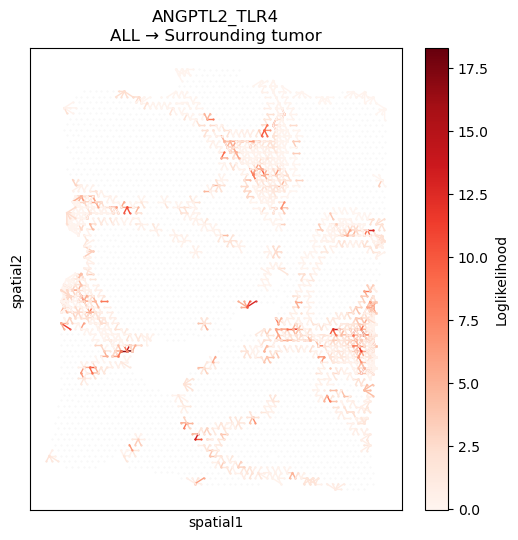

In [335]:
lig_rec_idx = 'ANGPTL2_TLR4'
ct =  'Surrounding tumor'
plot_lr_activity_arrow(
    lig_rec_idx,
    ct,
    res,
    loc_df,
    int_edges_new,
    umi_sums_ct_dict,
    data_list_ct_dict,
    dist_list_ct_dict
)

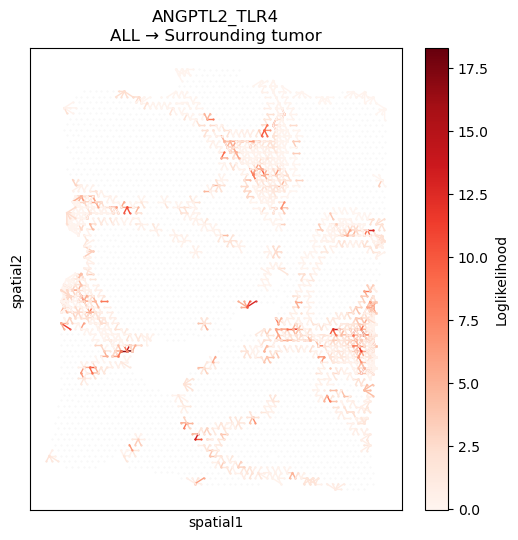

In [318]:
lig_rec_idx = 'ANGPTL2_TLR4'
ct =  'Surrounding tumor'
plot_lr_activity_color(
    lig_rec_idx,
    ct,
    res,
    loc_df,
    int_edges_new,
    umi_sums_ct_dict,
    data_list_ct_dict,
    dist_list_ct_dict
)

In [341]:
def plot_lr_activity(
    lig_rec_idx,
    ct,
    res,
    loc_df,
    int_edges_new,
    umi_sums_ct_dict,
    data_list_ct_dict,
    dist_list_ct_dict
):
    
    rho_zero,rho_one,mu_x,mu_y,copula_method,idx = res.loc[lig_rec_idx]
    loglikvec =  model.log_joint_lik_perm_dist(
            [rho_zero,rho_one,mu_x,mu_y],
            umi_sums_ct_dict[ct]['source'],
            umi_sums_ct_dict[ct]['target'],
            data_list_ct_dict[ct][idx][0],
            data_list_ct_dict[ct][idx][1],
            dist_list_ct_dict[ct],
            perm=20,
            DT=False,
            model='copula',
            return_sum=False
        
        )
    loglikvec = -loglikvec
    loglikvec = loglikvec / loglikvec.sum()
    lr_pairs_ct = int_edges_new.loc[
        int_edges_new.celltype2 == ct,
        :
    ].copy()
    fig, ax = plt.subplots(figsize=(5,6))

    ax.scatter(loc_df['x'], loc_df['y'], c= "grey", s=0.1,alpha = 0.1)
    #sns.scatterplot(data = int_loc_df, x = "x", y = "y", s = 8, hue='dist_from_z', ax=ax, alpha=0.8,label='start')
    
    for i,edge in enumerate(lr_pairs_ct[['cell1', 'cell2']].values):
        x1, y1 = loc_df.loc[  edge[0], 'x' ], loc_df.loc[  edge[0], 'y' ]
        x2, y2 = loc_df.loc[  edge[1], 'x' ], loc_df.loc[  edge[1], 'y' ]
        ax.plot([x1, x2], [y1, y2], color='red', alpha = 0.1,
                linewidth = loglikvec[i])
    ax.set_title(lig_rec_idx + "\nALL" + ' → '+ ct)
    plt.gca().invert_yaxis()
    plt.gca().set_xticks([])
    plt.gca().set_yticks([]);
    plt.xlabel("spatial1")
    plt.ylabel("spatial2")

In [220]:
def plot_lr_correlation(
    lig_rec_idx,
    ct,
    res,
    data_list_ct_dict,
):
    
    rho_zero,rho_one,mu_x,mu_y,copula_method,idx = res.loc[lig_rec_idx]

    fig, ax = plt.subplots(figsize=(5,5))
    ax.scatter(
        data_list_ct_dict[ct][idx][0],
        data_list_ct_dict[ct][idx][1],
        s = 5
    )
    
    ax.set_title(lig_rec_idx + "\nALL" + ' → '+ ct)
    
    plt.xlabel("spatial1")
    plt.ylabel("spatial2")

In [338]:
def plot_raw_lr_expression(
    lig_rec_idx,
    ct,
    res,
    loc_df,
    count_df,
    int_edges_new
):
    
    rho_zero,rho_one,mu_x,mu_y,copula_method,idx = res.loc[lig_rec_idx]
    lr_pairs_ct = int_edges_new.loc[
        int_edges_new.celltype2 == ct,
        :
    ].copy()
    genes_to_show = lig_rec_idx.split("_")
    
    #sns.scatterplot(data = int_loc_df, x = "x", y = "y", s = 8, hue='dist_from_z', ax=ax, alpha=0.8,label='start')
    selected_cells = list(
        set(lr_pairs_ct.cell1.unique()).union(
            lr_pairs_ct.cell2.unique()   
        )
    )
    fig, ax = plt.subplots(1,len(genes_to_show),
                           figsize=(5*len(genes_to_show),5))
    for i,gene in enumerate(genes_to_show):
        ax[i].scatter(loc_df['x'], loc_df['y'], c= "grey", s=0.1,alpha = 0.1)
        colors = np.array(count_df.loc[selected_cells, gene].values)
        tmp = loc_df.loc[selected_cells,:].copy()
        tmp.loc[:, 'gene'] = colors
        sns.scatterplot(x='x', y='y', hue='gene',
                             palette='Reds',s=20, data=tmp,alpha=0.7,ax= ax[i])

        norm = plt.Normalize(tmp['gene'].min(), tmp['gene'].max())
        sm = plt.cm.ScalarMappable(cmap="Reds", norm=norm)
        sm.set_array([])
        
        # Remove the legend and add a colorbar
        ax[i].get_legend().remove()
        
    
        ax[i].set_title(gene + "\nALL" + ' → '+ ct)
        ax[i].figure.colorbar(sm,ax=ax[i])
        ax[i].invert_yaxis()
        ax[i].set_xticks([])
        ax[i].set_yticks([]);
        ax[i].set_xlabel("spatial1")
        ax[i].set_ylabel("spatial2")
    plt.tight_layout()
    plt.show()

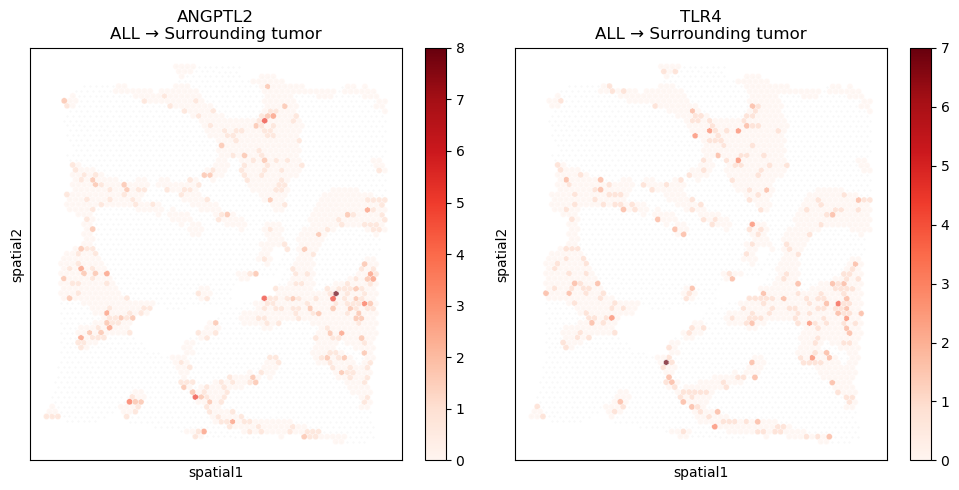

In [289]:
lig_rec_idx = 'ANGPTL2_TLR4'
ct =  'Surrounding tumor'
plot_raw_lr_expression(
    lig_rec_idx,
    ct,
    res,
    loc_df,
    count_df,
    int_edges_new
)

In [271]:
rho_zero,rho_one,mu_x,mu_y,copula_method,idx = res.loc[lig_rec_idx]

In [272]:
idx

1145

In [274]:
data_list_ct_dict[ct][idx][0].max()

5

In [275]:
data_list_ct_dict[ct][idx][1].max()

4

In [ ]:
data_list_ct_dict[ct][idx][0],
            data_list_ct_dict[ct][idx][1],

In [278]:
lig, rec = lig_rec_idx.split('_')

In [279]:
lig_rec_idx.split('_')

['ANGPTL2', 'TLR4']

In [282]:
count_df.loc[ lr_pairs_ct.cell1.values,lig ].values.astype('int').max()

5

In [283]:
count_df.loc[ lr_pairs_ct.cell2.values,rec ].values.astype('int').max()

4

In [267]:
lr_pairs_ct = int_edges_new.loc[
    int_edges_new.celltype2 == ct,
    :
].copy()

In [268]:
selected_cells = list(
    set(lr_pairs_ct.cell1.unique()).union(
        lr_pairs_ct.cell2.unique()   
    )
)

(array([1.074e+03, 2.590e+02, 6.000e+01, 1.200e+01, 0.000e+00, 2.000e+00,
        4.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0.        , 0.80000001, 1.60000002, 2.4000001 , 3.20000005,
        4.        , 4.80000019, 5.5999999 , 6.4000001 , 7.19999981,
        8.        ]),
 <BarContainer object of 10 artists>)

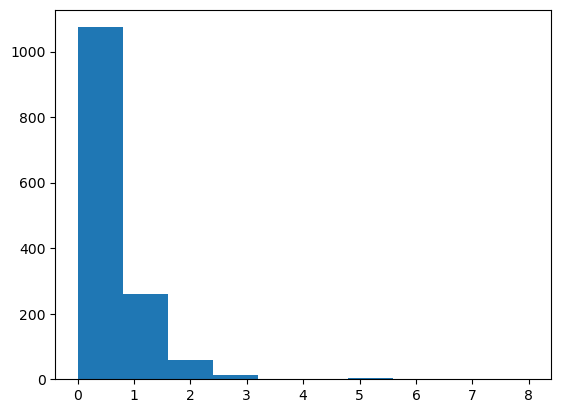

In [270]:
plt.hist(count_df.loc[selected_cells, 'ANGPTL2'].values)

In [191]:
adata.obs.old_annot_type.unique()

['Surrounding tumor', 'Invasive', 'Healthy', 'Tumor']
Categories (4, object): ['Healthy', 'Invasive', 'Surrounding tumor', 'Tumor']

In [195]:
for ct in adata.obs.old_annot_type.unique():
    res = cop_df_ct_dict[ct].sort_values(
        ['rho_zero'], ascending=False)
    res = res.loc[res.copula_method == 'copula'].fillna(0)
    res = res.loc[
            res.index.str.split('_').str[0] != res.index.str.split('_').str[1]
        ].copy()
    res = res.join(df_lig_rec[['idx']])
    print(res.head())

                rho_zero  rho_one      mu_x      mu_y copula_method   idx
ANGPTL2_TLR4    0.331372      0.0 -7.628969 -7.774855        copula  1145
LCK_CD8A_CD8B1  0.307300      0.0 -7.400446 -7.560395        copula    44
PDGFB_PDGFRA    0.261243      0.0 -7.733124 -7.653528        copula  1195
IL16_CD4        0.225444      0.0 -7.308995 -6.747454        copula  1105
HLA-DOA_CD4     0.223855      0.0 -7.626348 -6.747271        copula   250
                  rho_zero   rho_one      mu_x      mu_y copula_method  idx
WNT9A_FZD10_LRP5  0.301429  0.000000 -8.423445 -7.933000        copula  783
WNT9A_FZD9_LRP5   0.293071  0.000000 -8.424686 -7.947928        copula  775
LCK_CD8A_CD8B1    0.291938  0.000000 -7.913758 -7.844993        copula   44
SLURP1_CHRNB1     0.269377  0.025749 -8.055573 -8.375368        copula  679
EFNB1_EPHB2       0.258557  0.002559 -8.085917 -8.233732        copula    4
                    rho_zero   rho_one      mu_x      mu_y copula_method  idx
THBS3_CD47          0.

In [194]:
res.head()

,rho_zero,rho_one,mu_x,mu_y,copula_method,idx
WNT9A_FZD10_LRP5,0.301429,0.000000,-8.423445,-7.933000,copula,783
WNT9A_FZD9_LRP5,0.293071,0.000000,-8.424686,-7.947928,copula,775
LCK_CD8A_CD8B1,0.291938,0.000000,-7.913758,-7.844993,copula,44
SLURP1_CHRNB1,0.269377,0.025749,-8.055573,-8.375368,copula,679
EFNB1_EPHB2,0.258557,0.002559,-8.085917,-8.233732,copula,4


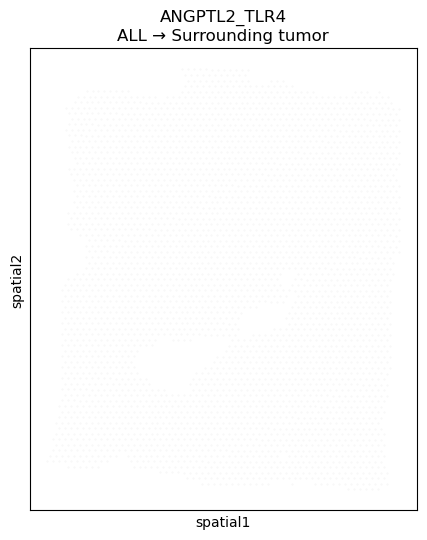

In [342]:
lig_rec_idx = 'ANGPTL2_TLR4'
ct =  'Surrounding tumor'
plot_lr_activity(
    lig_rec_idx,
    ct,
    res,
    loc_df,
    int_edges_new,
    umi_sums_ct_dict,
    data_list_ct_dict,
    dist_list_ct_dict
)

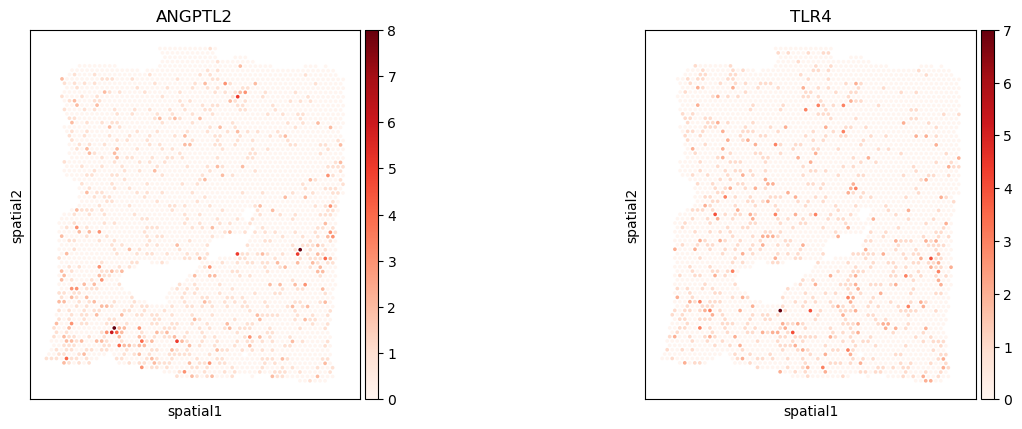

In [199]:
sc.pl.spatial(adata, img_key=None, 
              color = ['ANGPTL2',
                        'TLR4'
                    ],spot_size=200, cmap='Reds')

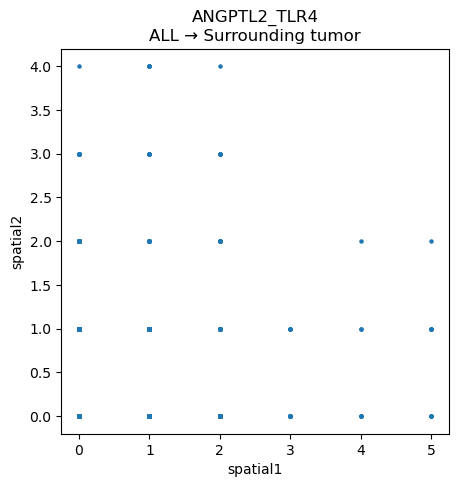

In [221]:
lig_rec_idx = 'ANGPTL2_TLR4'
ct =  'Surrounding tumor'
plot_lr_correlation(
    lig_rec_idx,
    ct,
    res,
    data_list_ct_dict
)

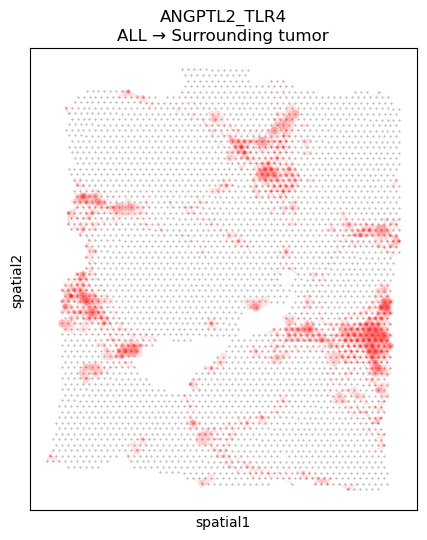

In [188]:
lig_rec_idx = 'ANGPTL2_TLR4'
ct =  'Surrounding tumor'
plot_lr_activity(
    lig_rec_idx,
    ct,
    res,
    loc_df,
    umi_sums_ct_dict,
    data_list_ct_dict,
    dist_list_ct_dict
)

In [363]:
importlib.reload(model)

<module 'model' from '/Users/hs0424/Workspace/copulacci/src/copulacci/model.py'>

In [419]:
def run_diff_copula(
    data_list_dict: dict,
    umi_sums: dict,
    group_1,
    group_2,
    dist_list_dict: dict = None,
    lig_rec_pair_list = None,
    n_jobs = 20,
    verbose = 1,
    method = 'Nelder-Mead',
    perm = 10,
    DT=True,
    cutoff=0.6,
    length_cutoff=20,
    model_type='copula',
    num_restarts = 1,
    force=False,
    quick=False,
    type_run = 'full',
    heteronomic = False,
    df_lig_rec = None
) -> pd.DataFrame:
    if isinstance(group_1, list) and len(group_1) > 1:
        raise ValueError('groups_1 has more than one group: not implemented yet')
    if isinstance(group_2, list) and len(group_2) > 1:
        raise ValueError('groups_2 has more than one group: not implemented yet')
    # null model
    # Fow all the ligands and receptors the null model 
    # assumes that the interaction coefficient is same
    # We merge the groups and run the copula
    print('Running null hypothesis on merged data')
    data_list_merged, umi_sums_merged, dist_list_merged = model.merge_data_groups(
        [group_1, group_2],
        data_list_dict,
        umi_sums,
        dist_list_dict = dist_list_dict,
    )
    likvalues_null = []
    if dist_list_dict is None:
        res = Parallel(n_jobs=n_jobs, verbose=verbose)(
                delayed(model.call_optimizer_dense)(
                    x,
                    y,
                    umi_sums_merged['ligand'],
                    umi_sums_merged['receptor'],
                    method=method,
                    perm=perm,
                    DT=DT,
                    cutoff=cutoff,
                    length_cutoff=length_cutoff,
                    model=model_type,
                    num_restarts = num_restarts,
            quick=quick) for (x,y) in data_list_merged)
        # Get likelihoods for these values
        tmp = pd.DataFrame(res,columns=['merged_null','null_mu_x',
                                        'null_mu_y','null_copula_method'])
        likvalues_null = []
        for i, row in enumerate(tmp.iterrows()):
            rho, mu_x, mu_y, meth = row[1]
            if meth == 'copula':
                likvalues_null += [model.log_joint_lik_perm(
                    [rho, mu_x, mu_y], 
                    umi_sums_merged['ligand'], 
                    umi_sums_merged['receptor'], 
                    data_list_merged[i][0],
                    data_list_merged[i][1],
                    perm=perm, 
                    DT=DT, 
                    model=model_type) 
                ]
            else:
                likvalues_null += [0]
        likvalues_null = -np.array(likvalues_null)
        tmp['merged_null_lik'] = likvalues_null
    else:
        res = Parallel(n_jobs=n_jobs, verbose=verbose)(
            delayed(model.call_optimizer_dense_dist)(
                x,
                y,
                umi_sums_merged['ligand'],
                umi_sums_merged['receptor'],
                dist_list_merged,
                method=method,
                perm=perm,
                DT=DT,
                cutoff=cutoff,
                length_cutoff=length_cutoff,
                model=model_type,
                num_restarts = num_restarts
                ) for (x,y) in data_list_merged
        )
        # Get likelihoods for these values
        tmp = pd.DataFrame(res,columns=['merged_null_zero', 'merged_null_one', 'null_mu_x', 
                                        'null_mu_y', 'null_copula_method'])
        likvalues_null = []
        
        for i, row in enumerate(tmp.iterrows()):
            rho_zero, rho_one, mu_x, mu_y, meth = row[1]
            if meth == 'copula':
                likvalues_null += [model.log_joint_lik_perm_dist(
                    [rho_zero, rho_one, mu_x, mu_y], 
                    umi_sums_merged['ligand'], 
                    umi_sums_merged['receptor'], 
                    data_list_merged[i][0], 
                    data_list_merged[i][1], 
                    dist_list_merged,
                    perm=perm, 
                    DT=DT, 
                    model=model_type) 
                ]
            else:
                likvalues_null += [0]
        likvalues_null = -np.array(likvalues_null)
        tmp['merged_null_lik'] = likvalues_null
    null_df = tmp.copy()
    # alternative model
    # Run for group1
    cop_alt_df = model.run_copula(
        data_list_dict,
        umi_sums,
        dist_list_dict,
        DT=DT,
        cutoff = cutoff,
        type_run='dense',
        num_restarts=1,
        df_lig_rec=df_lig_rec,
        heteronomic=True,
        groups = [group_1, group_2]
    )
    # Calculate likelihoods
    
    likvalues_alt = {}
    if dist_list_dict is None:
        for g in [group_1, group_2]:
            print('alternate hypothesis on ', g)
            g1, g2 = g.split('=')
            likvalues = []
            for i, [rho, mu_x, mu_y, meth] in enumerate(cop_alt_df[g].values):
                if meth == 'copula':
                    likvalues += [model.log_joint_lik_perm(
                        [rho, mu_x, mu_y], 
                        umi_sums[g][g1], 
                        umi_sums[g][g2], 
                        data_list_dict[g][i][0],
                        data_list_dict[g][i][1],
                        perm=perm, 
                        DT=DT, 
                        model=model_type) 
                    ]
                else:
                    likvalues += [0]
            likvalues_alt[g1] = (-np.array(likvalues)).copy()
    else:
        for g in [group_1, group_2]:
            print('alternate hypothesis on ', g)
            g1, g2 = g.split('=')
            likvalues = []
            for i, [rho_zero, rho_one, mu_x, mu_y, meth] in enumerate(cop_alt_df[g].values):
                if meth == 'copula':
                    likvalues += [model.log_joint_lik_perm_dist(
                        [rho_zero, rho_one, mu_x, mu_y], 
                        umi_sums[g][g1], 
                        umi_sums[g][g2], 
                        data_list_dict[g][i][0],
                        data_list_dict[g][i][1],
                        dist_list_dict[g],
                        perm=perm, 
                        DT=DT, 
                        model=model_type) 
                    ]
                else:
                    likvalues += [0]
            likvalues_alt[g1] = (-np.array(likvalues)).copy()
            
    return (likvalues_null, likvalues_alt)
    # TODO complete later

In [408]:
data_list_dict['Surrounding tumor=Surrounding tumor'][0]

(array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]))

In [409]:
lik_n, lik_a = run_diff_copula(
    data_list_dict,
    umi_sums,
    'Surrounding tumor=Surrounding tumor',
    'Invasive=Invasive',
    dist_list_dict = dist_list_dict,
    lig_rec_pair_list = None,
    n_jobs = 20,
    verbose = 1,
    method = 'Nelder-Mead',
    perm = 10,
    DT=False,
    cutoff=0.8,
    length_cutoff=20,
    model_type='copula',
    type_run = 'dense',
    heteronomic = True,
    df_lig_rec = df_lig_rec
)

Running null hypothesis on merged data


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 320 tasks      | elapsed:   20.7s
[Parallel(n_jobs=20)]: Done 570 tasks      | elapsed:   48.3s
[Parallel(n_jobs=20)]: Done 1119 tasks      | elapsed:  1.1min
[Parallel(n_jobs=20)]: Done 1276 out of 1315 | elapsed:  1.2min remaining:    2.3s
[Parallel(n_jobs=20)]: Done 1315 out of 1315 | elapsed:  1.3min finished


Surrounding tumor=Surrounding tumor


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 398 tasks      | elapsed:    6.4s
[Parallel(n_jobs=20)]: Done 690 tasks      | elapsed:   10.8s
[Parallel(n_jobs=20)]: Done 1315 out of 1315 | elapsed:   15.9s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s


Invasive=Invasive


[Parallel(n_jobs=20)]: Done 311 tasks      | elapsed:   17.6s
[Parallel(n_jobs=20)]: Done 570 tasks      | elapsed:   40.0s
[Parallel(n_jobs=20)]: Done 971 tasks      | elapsed:   56.3s
[Parallel(n_jobs=20)]: Done 1276 out of 1315 | elapsed:  1.1min remaining:    1.9s
[Parallel(n_jobs=20)]: Done 1315 out of 1315 | elapsed:  1.2min finished


alternate hypothesis on  Surrounding tumor=Surrounding tumor
alternate hypothesis on  Invasive=Invasive


In [420]:
lik_n = -1 * np.array(lik_n)

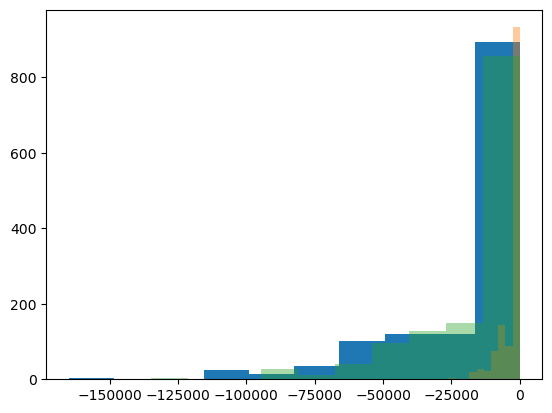

In [429]:
plt.hist(lik_n);
plt.hist(lik_a['Surrounding tumor'],alpha = 0.4);
plt.hist(lik_a['Invasive'], alpha = 0.4);

In [449]:
likhood_df = np.hstack(
    (np.array(list(lik_a.values())).T, lik_n[:, np.newaxis])
)

In [452]:
likhood_df = pd.DataFrame(likhood_df, columns=['alt_0', 'alt_1', 'null'])

In [469]:
likhood_df_nz = likhood_df[(likhood_df != 0).all(axis=1)]

In [471]:
likhood_df_nz

,alt_0,alt_1,null
32,-4087.295165,-18249.648966,-22434.849256
33,-5359.503574,-37384.516023,-43196.107050
35,-4363.146853,-28128.664352,-32763.206307
38,-4259.049768,-27529.955285,-32064.434687
41,-3132.871531,-17409.404627,-20552.015018
...,...,...,...
1265,-26327.723126,-134875.949291,-164776.462262
1266,-26299.325384,-133955.825648,-163767.365604
1267,-26343.518756,-134996.721284,-164908.276630
1270,-6563.459162,-30707.145429,-38445.730037


In [514]:
-22434 < (-4087.295165 + -18249.648966)

True

In [477]:
from scipy.stats import chi2

In [494]:
lr =  -2*(likhood_df_nz['null'] - ( likhood_df_nz['alt_0'] + likhood_df_nz['alt_1'] ))

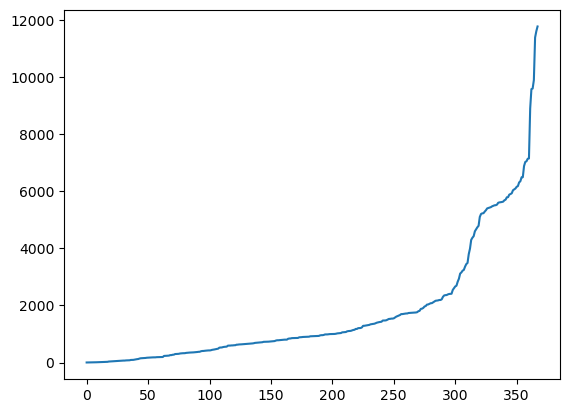

In [522]:
plt.plot(sorted(lr))

In [524]:
cop_df_dict['Surrounding tumor=Surrounding tumor']

,rho_zero,rho_one,mu_x,mu_y,copula_method,scc
EFNA5_EPHA8,0.000000,0.000000,0.000000,0.000000,skip,NaN
EFNA5_EPHB2,0.000000,0.000000,0.000000,0.000000,skip,-0.051060
EFNB1_EPHA4,0.000000,0.000000,0.000000,0.000000,skip,0.038487
EFNB1_EPHB1,0.000000,0.000000,0.000000,0.000000,skip,-0.025812
EFNB1_EPHB2,0.000000,0.000000,0.000000,0.000000,skip,0.021454
...,...,...,...,...,...,...
CCL3_CCR5,0.000000,0.000000,0.000000,0.000000,skip,0.052819
CCL5_CCR5,0.014684,0.001209,-5.944846,-7.739736,copula,0.107169
CCL4_CCR5,0.000000,0.000000,0.000000,0.000000,skip,0.069314
CXCL1_ACKR1,0.000000,0.000000,0.000000,0.000000,skip,-0.012936


In [549]:
importlib.reload(model)

<module 'model' from '/Users/hs0424/Workspace/copulacci/src/copulacci/model.py'>

In [682]:
import os
os.path.join('a', 'b')

'a/b'

In [550]:
pval_1 = model.add_copula_pval(
    data_list_dict,
    cop_df_dict,
    umi_sums,
    dist_list_dict,
    int_edges_new,
    count_df,
    n = 1000,
    groups = ['Surrounding tumor=Surrounding tumor'],
    heteronomic = True
) 

The permutation of spatial points for every L-R pair over 1K times will take a while ...
permutation test for ... Surrounding tumor=Surrounding tumor
found  77  pairs..
.

/Users/hs0424/miniforge3/envs/py390/lib/python3.9/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/Users/hs0424/miniforge3/envs/py390/lib/python3.9/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/Users/hs0424/miniforge3/envs/py390/lib/python3.9/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/Users/hs0424/miniforge3/envs/py390/lib/python3.9/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/Users/hs0424/miniforge3/env

.

/Users/hs0424/miniforge3/envs/py390/lib/python3.9/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/Users/hs0424/miniforge3/envs/py390/lib/python3.9/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/Users/hs0424/miniforge3/envs/py390/lib/python3.9/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/Users/hs0424/miniforge3/envs/py390/lib/python3.9/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/Users/hs0424/miniforge3/env

...........................................................................

computing pval for  Surrounding tumor=Surrounding tumor  with  77  pairs in  1634.1096239089966  seconds


In [681]:
pval_1

,rho_zero,rho_one,mu_x,mu_y,copula_method,scc,copula_coeff,lig_rec,pval,qval,celltype_direction
0,0.205826,0.000000,-7.319610,-7.312874,copula,0.736594,0.205826,ESAM_ESAM,0.0,0.0,Surrounding tumor=Surrounding tumor
1,0.310060,0.000000,-6.626757,-6.618235,copula,0.764307,0.310060,F11R_F11R,0.0,0.0,Surrounding tumor=Surrounding tumor
4,0.398727,0.000001,-7.570202,-7.558622,copula,0.728873,0.398727,JAM3_JAM3,0.0,0.0,Surrounding tumor=Surrounding tumor
5,0.256615,0.000000,-7.215223,-7.449990,copula,0.151752,0.256615,LCK_CD8A_CD8B1,0.0,0.0,Surrounding tumor=Surrounding tumor
16,0.135260,0.000000,-7.152533,-7.737999,copula,0.049001,0.135260,ICAM1_SPN,0.0,0.0,Surrounding tumor=Surrounding tumor
...,...,...,...,...,...,...,...,...,...,...,...
359,0.212361,0.000000,-7.525115,-7.746673,copula,0.146199,0.212361,ANGPTL2_TLR4,0.0,0.0,Surrounding tumor=Surrounding tumor
362,0.067425,0.000000,-4.127986,-5.320166,copula,0.086278,0.067425,C3_ITGAX_ITGB2,0.0,0.0,Surrounding tumor=Surrounding tumor
363,0.072839,0.000000,-4.127999,-5.442692,copula,0.089725,0.072839,C3_ITGAM_ITGB2,0.0,0.0,Surrounding tumor=Surrounding tumor
367,0.082763,0.016084,-6.859395,-7.483982,copula,0.093892,0.082763,VEGFA_VEGFR1R2,0.0,0.0,Surrounding tumor=Surrounding tumor


In [559]:
import scanpy as sc

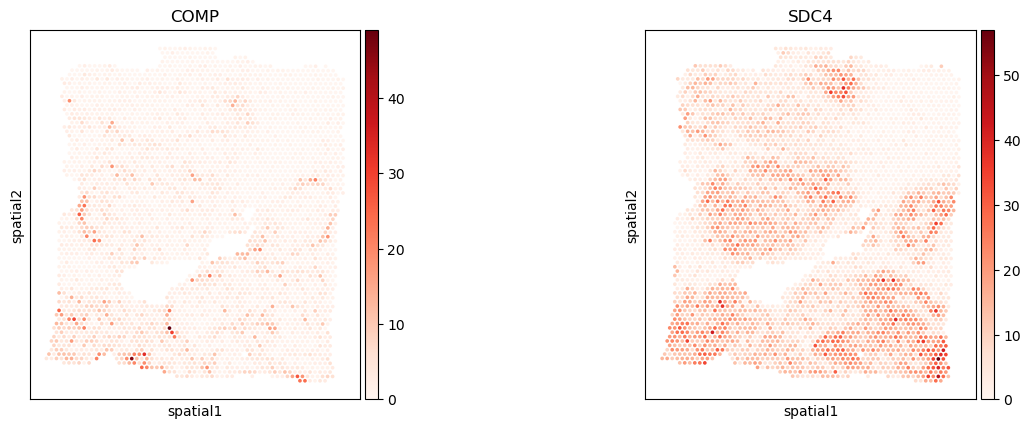

In [560]:
sc.pl.spatial(adata, img_key=None, 
              color = ['THBS3',
                        'SDC4'
                    ],spot_size=200, cmap='Reds')

In [534]:
if not 'copula_coeff' in tmp:
    tmp.loc[:, 'copula_coeff'] = tmp['rho_zero']

In [535]:
if 'copula_coeff' in tmp:
    print('ok')

ok


In [538]:
tmp.idx

,rho_zero,rho_one,mu_x,mu_y,copula_method,scc,copula_coeff
EFNA5_EPHA8,0.000000,0.000000,0.000000,0.000000,skip,NaN,0.000000
EFNA5_EPHB2,0.000000,0.000000,0.000000,0.000000,skip,-0.051060,0.000000
EFNB1_EPHA4,0.000000,0.000000,0.000000,0.000000,skip,0.038487,0.000000
EFNB1_EPHB1,0.000000,0.000000,0.000000,0.000000,skip,-0.025812,0.000000
EFNB1_EPHB2,0.000000,0.000000,0.000000,0.000000,skip,0.021454,0.000000
...,...,...,...,...,...,...,...
CCL3_CCR5,0.000000,0.000000,0.000000,0.000000,skip,0.052819,0.000000
CCL5_CCR5,0.014684,0.001209,-5.944846,-7.739736,copula,0.107169,0.014684
CCL4_CCR5,0.000000,0.000000,0.000000,0.000000,skip,0.069314,0.000000
CXCL1_ACKR1,0.000000,0.000000,0.000000,0.000000,skip,-0.012936,0.000000


In [506]:
chi2.sf(lr, 2)[0]

3.0223478773878947e-43

In [507]:
chi2.cdf(lr, 4)[:10]

array([1.        , 1.        , 1.        , 1.        , 0.99936697,
       1.        , 1.        , 1.        , 1.        , 1.        ])

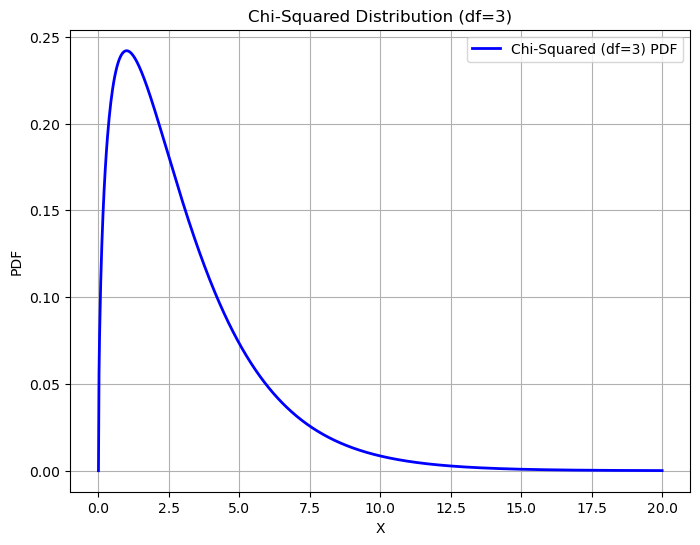

In [474]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Set the degrees of freedom
df = 3  # Change this to the desired value

# Generate x values
x = np.linspace(0, 20, 1000)  # Adjust the range as needed

# Calculate the probability density function (PDF) for the chi-squared distribution
pdf = chi2.pdf(x, df)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, pdf, 'b-', lw=2, label=f'Chi-Squared (df={df}) PDF')
plt.title(f'Chi-Squared Distribution (df={df})')
plt.xlabel('X')
plt.ylabel('PDF')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
model.log_joint_lik_perm_dist(
            [rho_zero,rho_one,mu_x,mu_y],
            umi_sums_ct_dict[ct]['source'],
            umi_sums_ct_dict[ct]['target'],
            data_list_ct_dict[ct][idx][0],
            data_list_ct_dict[ct][idx][1],
            dist_list_ct_dict[ct],
            perm=20,
            DT=False,
            model='copula',
            return_sum=False
        
        )

In [353]:
dist_list_dict.keys()

dict_keys(['Surrounding tumor=Surrounding tumor', 'Invasive=Invasive', 'Healthy=Healthy', 'Tumor=Tumor', 'Invasive=Surrounding tumor', 'Surrounding tumor=Invasive', 'Tumor=Invasive', 'Invasive=Tumor', 'Tumor=Surrounding tumor', 'Surrounding tumor=Tumor', 'Healthy=Tumor', 'Tumor=Healthy', 'Healthy=Surrounding tumor', 'Surrounding tumor=Healthy', 'Healthy=Invasive', 'Invasive=Healthy'])

In [352]:
data_list_dict

(array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]))

In [375]:
tmp = cop_df_dict['Surrounding tumor=Surrounding tumor'].copy()

In [377]:
for i, row in enumerate(tmp.iterrows()):
    break

In [402]:
 for i, [rho_zero, rho_one, mu_x, mu_y, meth, sc] in enumerate(tmp.values):
     break

In [403]:
rho_zero, rho_one, mu_x, mu_y, meth, sc

(0.0, 0.0, 0.0, 0.0, 'skip', nan)

In [383]:
r0, r1, mx, my, meth, sc

(0.0, 0.0, 0.0, 0.0, 'skip', nan)

## pvalue story

In [625]:
cop_df_dict.keys()

dict_keys(['Surrounding tumor=Surrounding tumor', 'Invasive=Invasive', 'Healthy=Healthy', 'Tumor=Tumor', 'Invasive=Surrounding tumor', 'Surrounding tumor=Invasive', 'Tumor=Invasive', 'Invasive=Tumor', 'Tumor=Surrounding tumor', 'Surrounding tumor=Tumor', 'Healthy=Tumor', 'Tumor=Healthy', 'Healthy=Surrounding tumor', 'Surrounding tumor=Healthy', 'Healthy=Invasive', 'Invasive=Healthy'])

In [638]:
g1 = 'Surrounding tumor=Surrounding tumor'
res_bg = cop_df_dict[g1].copy()
g11, g12 = g1.split('=')
data_list = data_list_dict[g1]
res_bg.loc[:, 'lig_rec'] = res_bg.index
res_bg.index = range(len(res_bg))

res_bg = res_bg.loc[res_bg.copula_method == 'copula']

In [639]:
res_bg['copula_coeff'] = res_bg['rho_zero'].copy()

In [640]:
res_bg['lig'] = res_bg.lig_rec.str.split('_').str[0]
res_bg['rec'] = res_bg.lig_rec.str.split('_').str[1]

In [642]:
res_bg = res_bg.loc[res_bg.lig != res_bg.rec].copy()

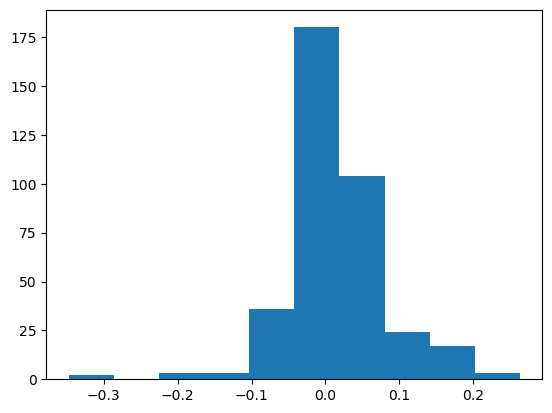

In [643]:
plt.hist(res_bg.copula_coeff);

In [645]:
np.percentile(
    res_bg.copula_coeff.values, 
    95
)

0.14537182993728723

In [646]:
intersting_pairs = res_bg[res_bg['copula_coeff'] >= np.percentile(
    res_bg.copula_coeff.values, 
    95
)].index
res_bg = res_bg.loc[ intersting_pairs ]
res_bg['pval'] = 1.0

In [647]:
res_bg

,rho_zero,rho_one,mu_x,mu_y,copula_method,scc,lig_rec,copula_coeff,lig,rec,pval
44,0.256615,0.000000,-7.215223,-7.449990,copula,0.151752,LCK_CD8A_CD8B1,0.256615,LCK,CD8A,1.0
170,0.180731,0.000000,-7.001859,-7.634357,copula,0.148233,SELPLG_SELL,0.180731,SELPLG,SELL,1.0
250,0.148572,0.001943,-7.542467,-6.661641,copula,0.142735,HLA-DOA_CD4,0.148572,HLA-DOA,CD4,1.0
474,0.146276,0.000000,-5.653890,-5.385167,copula,0.077360,COMP_SDC1,0.146276,COMP,SDC1,1.0
477,0.187223,0.000000,-7.171554,-5.255581,copula,0.097505,COL2A1_SDC4,0.187223,COL2A1,SDC4,1.0
487,0.163405,0.000000,-5.992438,-5.248615,copula,0.160068,COL9A2_SDC4,0.163405,COL9A2,SDC4,1.0
571,0.147307,0.000000,-7.171098,-5.388979,copula,0.089611,COL2A1_SDC1,0.147307,COL2A1,SDC1,1.0
581,0.184706,0.000000,-5.990725,-5.381423,copula,0.163295,COL9A2_SDC1,0.184706,COL9A2,SDC1,1.0
642,0.156826,0.000000,-7.520941,-7.582650,copula,0.150711,SEMA3B_NRP2_PLXNA4,0.156826,SEMA3B,NRP2,1.0
671,0.262936,0.000000,-7.742793,-7.703097,copula,0.114239,GZMA_F2RL2,0.262936,GZMA,F2RL2,1.0


In [665]:
n = 1000
progress = 0
for i in intersting_pairs[:1]:
    #if i%interval == 0:
    print(progress, end='\r', flush=True)
    x,y = data_list[i]
    I = res_bg.loc[i].copula_coeff
    perm_data_list = []
    for _ in range(n):
        x1 = x.copy()
        y1 = y.copy()
        np.random.shuffle(x1)
        np.random.shuffle(y1)
        perm_data_list += [
            (
            x1.copy(),
            y1.copy()
            )
            
        ]
    res = Parallel(n_jobs=10, verbose=1)(
            delayed(model.call_optimizer_dense_dist)(
                x,
                y,
                umi_sums[g1][g11],
                umi_sums[g1][g12],
                dist_list_dict[g1],
                method='Nelder-Mead',
                perm=20,
                DT=False,
                cutoff=0.8,
                length_cutoff=20,
                model='copula',
                num_restarts = 2
                ) for (x,y) in perm_data_list)
    res_perm = [r[0] for r in res]
    rec_perm_bk = res_perm.copy()
    res_perm += [I]
    pvalue = np.sum(np.array(res_perm) > I) / (n+1)
    res_bg.loc[i, 'pval'] = pvalue
    progress += 1

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    2.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:   11.0s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:   26.1s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:   47.4s
[Parallel(n_jobs=10)]: Done 1000 out of 1000 | elapsed:  1.0min finished


In [654]:
res_bg.sort_values(['copula_coeff']).head()

,rho_zero,rho_one,mu_x,mu_y,copula_method,scc,lig_rec,copula_coeff,lig,rec,pval
474,0.146276,0.000000,-5.653890,-5.385167,copula,0.077360,COMP_SDC1,0.146276,COMP,SDC1,1.0
571,0.147307,0.000000,-7.171098,-5.388979,copula,0.089611,COL2A1_SDC1,0.147307,COL2A1,SDC1,0.0
250,0.148572,0.001943,-7.542467,-6.661641,copula,0.142735,HLA-DOA_CD4,0.148572,HLA-DOA,CD4,1.0
1105,0.148580,0.029543,-7.096377,-6.660691,copula,0.169419,IL16_CD4,0.148580,IL16,CD4,1.0
824,0.154563,0.031165,-7.569399,-7.609308,copula,0.061869,WNT4_FZD5_LRP6,0.154563,WNT4,FZD5,1.0


In [675]:
pvalue

0.0

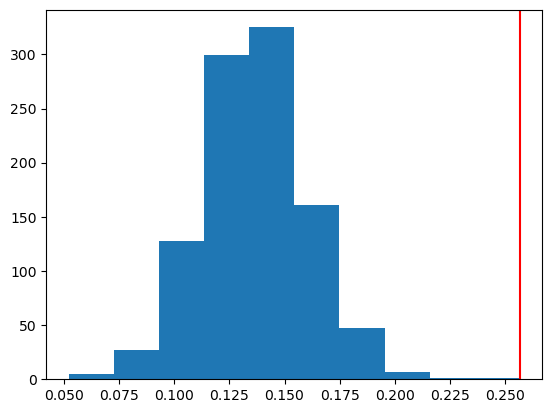

In [673]:
plt.hist(res_perm);
plt.axvline(x=I,color='red');

(array([  2.,   3.,  11.,  19., 109., 181., 212., 252., 177.,  34.]),
 array([-7.24150913, -7.23739918, -7.23328923, -7.22917928, -7.22506933,
        -7.22095938, -7.21684943, -7.21273949, -7.20862954, -7.20451959,
        -7.20040964]),
 <BarContainer object of 10 artists>)

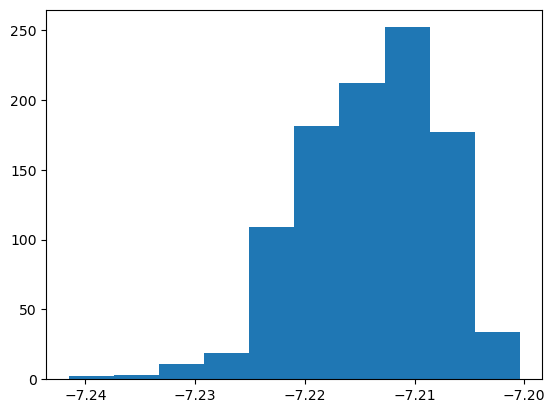

In [671]:
plt.hist(pd.DataFrame(res).loc[:,2])